# MNIST dataset

Focus:

* Performing K-means on the dataset
* PCA for dimensionality reduction
* Performing agglomerative clustering on this dataset


In [1]:
import math
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, adjusted_rand_score

from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from scipy.spatial.distance import pdist 

C:\Users\Tamanna\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


## Clustering 

In [8]:
#Detailed information for the dataset: https://en.wikipedia.org/wiki/MNIST_database.

#Load the data. Orignal data set has been processed (downsampled) to facilitate your data analysis
raw_data = pd.read_csv(r"C:\Users\Tamanna\Downloads\data week4\mnist-0.1.csv")
print('\n data size: (%d, %d)\n' % raw_data.shape)

# Specifying features and target attribute
X = raw_data.drop(['Label'], axis='columns')

# Pre-processing with standardization
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
X_data = X.values
X_scaled = scaler.fit_transform(X_data)
X = X_scaled

y = raw_data['Label'].values


 data size: (5243, 785)



In [9]:
# K-means clustering model
model = KMeans(n_clusters=2)
model.fit(X)
print('\n cluster means: \n', model.cluster_centers_)
print('\n inertia: %f'% model.inertia_)
print('\n average inertia: %f\n' % math.sqrt(model.inertia_/y.size))


 cluster means: 
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

 inertia: 214710.126187

 average inertia: 6.399357



In [10]:
# Evaluation (internal)
labels = model.labels_
scores=davies_bouldin_score(X, labels)
print('\n davies_bouldin_score: %f\n' % scores)


 davies_bouldin_score: 2.722454



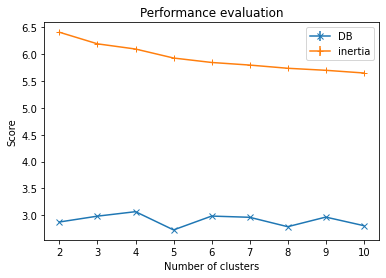

In [12]:
# Internal evaluation, davies bouldin score (the lower, the better)
db_scores = []
db_scores_std = []


# Inertia (average standardized)
inertia = []
inertia_std = []

for i in range(2, 11):
    # Multiple runs for stable indicators
    db_scores_tmp = []
    inertias_tmp = []
    
    n_iteration=10
    for j in range(0, n_iteration):
        # Note: 'random_state' parameter should be set as default or None
        #kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
        kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=3, n_init=2,random_state=0)
        kmeans.fit(X)
        labels = kmeans.labels_
        db_scores_tmp.append(davies_bouldin_score(X, labels))
        inertias_tmp.append(math.sqrt(kmeans.inertia_/X.shape[0]))
    
    db_scores.append(np.mean(db_scores_tmp))
    db_scores_std.append(np.std(db_scores_tmp))
    inertia.append(np.mean(inertias_tmp))
    inertia_std.append(np.std(inertias_tmp))

# Plot the relationship between the davies bouldin score and k
plt.errorbar(range(2, 11), db_scores, yerr=db_scores_std, marker='x', label='DB')
#plt.errorbar(range(2, 11), ar_scores, yerr=ar_scores_std, marker='o', label='AR')
plt.errorbar(range(2, 11), inertia, yerr=inertia_std, marker='+', label='inertia')
plt.title('Performance evaluation')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()

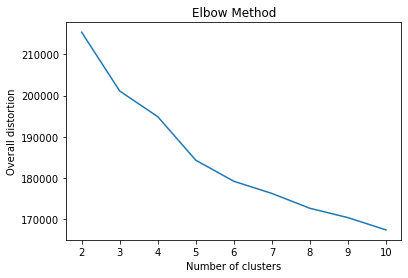

In [13]:
distortions1 = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=3, n_init=2,random_state=0)
    kmeans.fit(X)
    distortions1.append(kmeans.inertia_)
    
# Plot the relationship between the distortion and k. Then, we can have the Elbow method to help identify a good value for k.
plt.plot(range(2, 11), distortions1)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Overall distortion')

plt.show()

In [14]:
#davies bouldin score
model1 = KMeans(n_clusters=10)
model1.fit(X)
labels1 = model1.labels_
scores=davies_bouldin_score(X, labels1)
print('\n davies_bouldin_score: %f\n' % scores)


 davies_bouldin_score: 2.728847



In [15]:
from sklearn.decomposition import PCA

0.6228928442495187

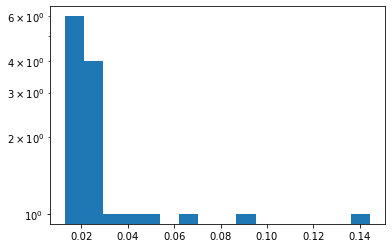

In [16]:
X_train = raw_data.drop(['Label'], axis='columns', inplace=False)
y_train = raw_data['Label']

from sklearn.model_selection import train_test_split
X_tr, X_ts, y_tr, y_ts = train_test_split(X_train, y_train, test_size=0.30, random_state=4)

n_components = 16

pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)

X_train_pca = pca.transform(X_train)

plt.hist(pca.explained_variance_ratio_, bins=n_components, log=True)
pca.explained_variance_ratio_.sum()

In [17]:
#davies bouldin score
model2 = KMeans(n_clusters=10)
model2.fit(X_train_pca)

labels2 = model2.labels_
scores=davies_bouldin_score(X_train_pca, labels2)
print('\n davies_bouldin_score: %f\n' % scores)


 davies_bouldin_score: 2.158876



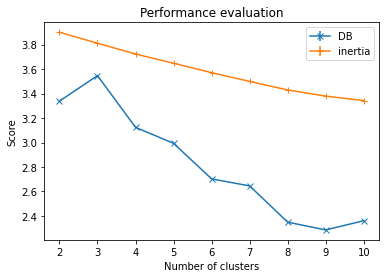

In [18]:
db_scores = []
db_scores_std = []

# External evaluation, adjusted rand index (the higher, the better)
#ar_scores = []
#ar_scores_std = []

# Inertia (average standardized)
inertia = []
inertia_std = []

for i in range(2, 11):
    # Multiple runs for stable indicators
    db_scores_tmp = []
    inertias_tmp = []
    
    n_iteration=10
    for j in range(0, n_iteration):
        # Note: 'random_state' parameter should be set as default or None
        #kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
        kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=5, n_init=3,random_state=0)
        kmeans.fit(X_train_pca)
        labels = kmeans.labels_
        db_scores_tmp.append(davies_bouldin_score(X_train_pca, labels))
        #ar_scores_tmp.append(adjusted_rand_score(labels, y_pred))
        inertias_tmp.append(math.sqrt(kmeans.inertia_/X_train_pca.shape[0]))
    
    db_scores.append(np.mean(db_scores_tmp))
    db_scores_std.append(np.std(db_scores_tmp))
   
    inertia.append(np.mean(inertias_tmp))
    inertia_std.append(np.std(inertias_tmp))

# Plot the relationship between the davies bouldin score and k

plt.errorbar(range(2, 11), db_scores, yerr=db_scores_std, marker='x', label='DB')
plt.errorbar(range(2, 11), inertia, yerr=inertia_std, marker='+', label='inertia')
plt.title('Performance evaluation')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()

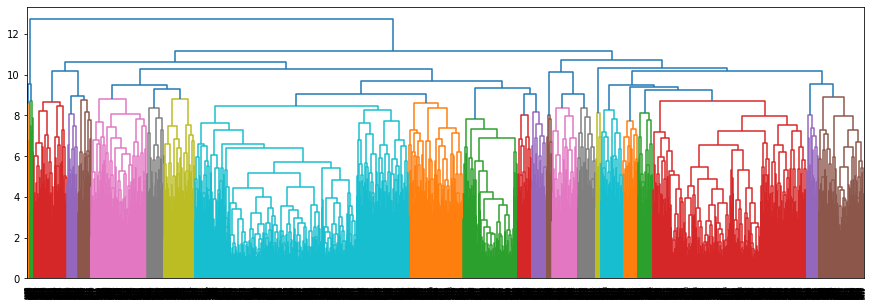

In [20]:
#performing agglomerative clustering on the dataset, and visualise the hierarchy.

dist = pdist(X_train_pca, 'euclidean')
linkage_matrix = linkage(dist, method = 'complete')

plt.figure(figsize=(15,5))
dendrogram(linkage_matrix)

plt.show()
